# Уравнение теплопроводности, поправка начального условия

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
#a - нижняя диагональ
#b - средняя
#с - верхняя
def three_diag(a, b, c, f):
    n = len(f)
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    x = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = f[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (f[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    x[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        x[i-1] = g[i-1] - w[i-1]*x[i]
    return x

#индексация 0 .. М - 1
def init_matrix(M, h, tau, beta, u):
    a = [-1 / h**2] * (M - 1)
    a[M - 2] = 0
    
    b = [2 / h**2 + 1 / tau - beta] * M
    b[0] = b[M - 1] = 1
    
    c = [-1 / h**2] * (M - 1)
    c[0] = 0
        
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    f = u(np.linspace(0, math.pi, M))
    return (a, b, c, f)


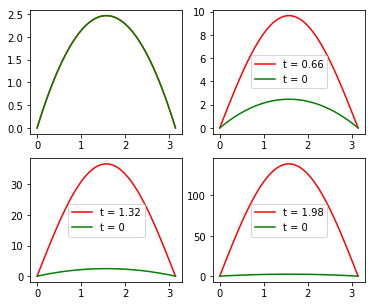

In [16]:
tau = 1e-2
M = 50
h = math.pi / M
iters = 200

a, b, c, f = init_matrix(M + 1, h, tau, 3, lambda x: x * (math.pi - x))
x = np.linspace(0, math.pi, M + 1)
res = []
res.append(np.linalg.norm(f))

fig = plt.figure()
plt.subplots(2,2,figsize=(6,5))
plt.subplot(2, 2, 1)
plt.plot(x, f, 'r')
plt.plot(x, x * (math.pi - x), 'g')

for i in range(1, iters + 1):
    f = three_diag(a,b,c,f/tau)
    res.append(np.linalg.norm(f))
    if i % (iters // 3) == 0:
        plt.subplot(2, 2, i // (iters // 3) + 1)
        plt.plot(x, f, 'r', label = 't = ' + "{0}".format(tau * i))
        plt.plot(x, x * (math.pi - x), 'g', label = 't = 0')
        plt.legend()


Решение неограниченно растёт со временем.

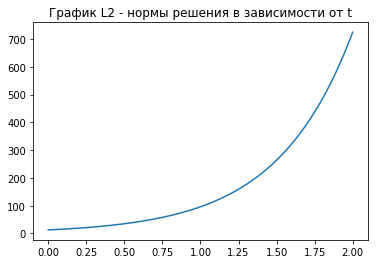

In [17]:
t = np.linspace(0, iters * tau, iters + 1)
plt.figure()
plt.title(u"График L2 - нормы решения в зависимости от t")
plt.plot(t, res)
plt.show()

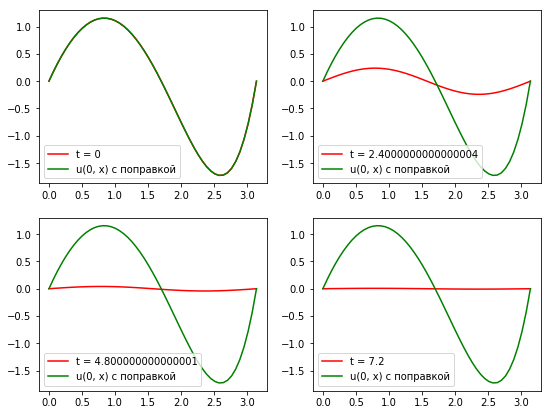

In [18]:
tau = 0.8
M = 50
h = math.pi / M
iters = 9

x = np.linspace(0, math.pi, M + 1)
c1 = -np.sum(x * (math.pi - x) * np.sin(x)) / np.sum(np.exp(x) * np.sin(x)**2)

a, b, c, f = init_matrix(M + 1, h, tau, 3, lambda x: x * (math.pi - x) + c1 * np.exp(x) * np.sin(x))
x = np.linspace(0, math.pi, M + 1)

fig = plt.figure()
plt.subplots(2,2,figsize=(9,7))
plt.subplot(2, 2, 1)
plt.plot(x, f, 'r', label = 't = 0')
plt.plot(x, x * (math.pi - x) + c1 * np.exp(x) * np.sin(x), 'g', label = 'u(0, x) с поправкой')
plt.legend()

for i in range(1, iters + 1):
    f = three_diag(a,b,c,f/tau)
    if i % 3 == 0:
        plt.subplot(2, 2, i // (iters // 3) + 1)
        plt.plot(x, f, 'r', label = 't = ' + "{0}".format(tau * i))
        plt.plot(x, x * (math.pi - x) + c1 * np.exp(x) * np.sin(x), 'g', label = 'u(0, x) с поправкой')
        plt.legend()
    


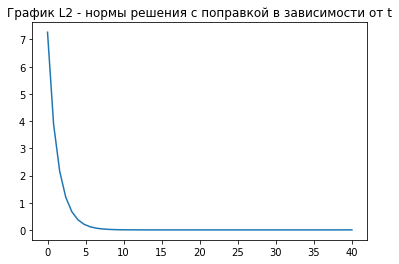

In [21]:
tau = 0.8
M = 50
h = math.pi / M
iters = 50

x = np.linspace(0, math.pi, M + 1)
c1 = -np.sum(x * (math.pi - x) * np.sin(x)) / np.sum(np.exp(x) * np.sin(x)**2)

a, b, c, f = init_matrix(M + 1, h, tau, 3, lambda x: x * (math.pi - x) + c1 * np.exp(x) * np.sin(x))
x = np.linspace(0, math.pi, M + 1)
res = []
res.append(np.linalg.norm(f))

for i in range(1, iters + 1):
    f = three_diag(a,b,c,f/tau)
    res.append(np.linalg.norm(f))

t = np.linspace(0, iters * tau, iters + 1)
plt.figure()
plt.title(u"График L2 - нормы решения с поправкой в зависимости от t")
plt.plot(t, res)
plt.show()